<a href="https://colab.research.google.com/github/Mugunthan-2003/Linear-Algebra-Coding-way/blob/main/Diagonalization/Diagonalization_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

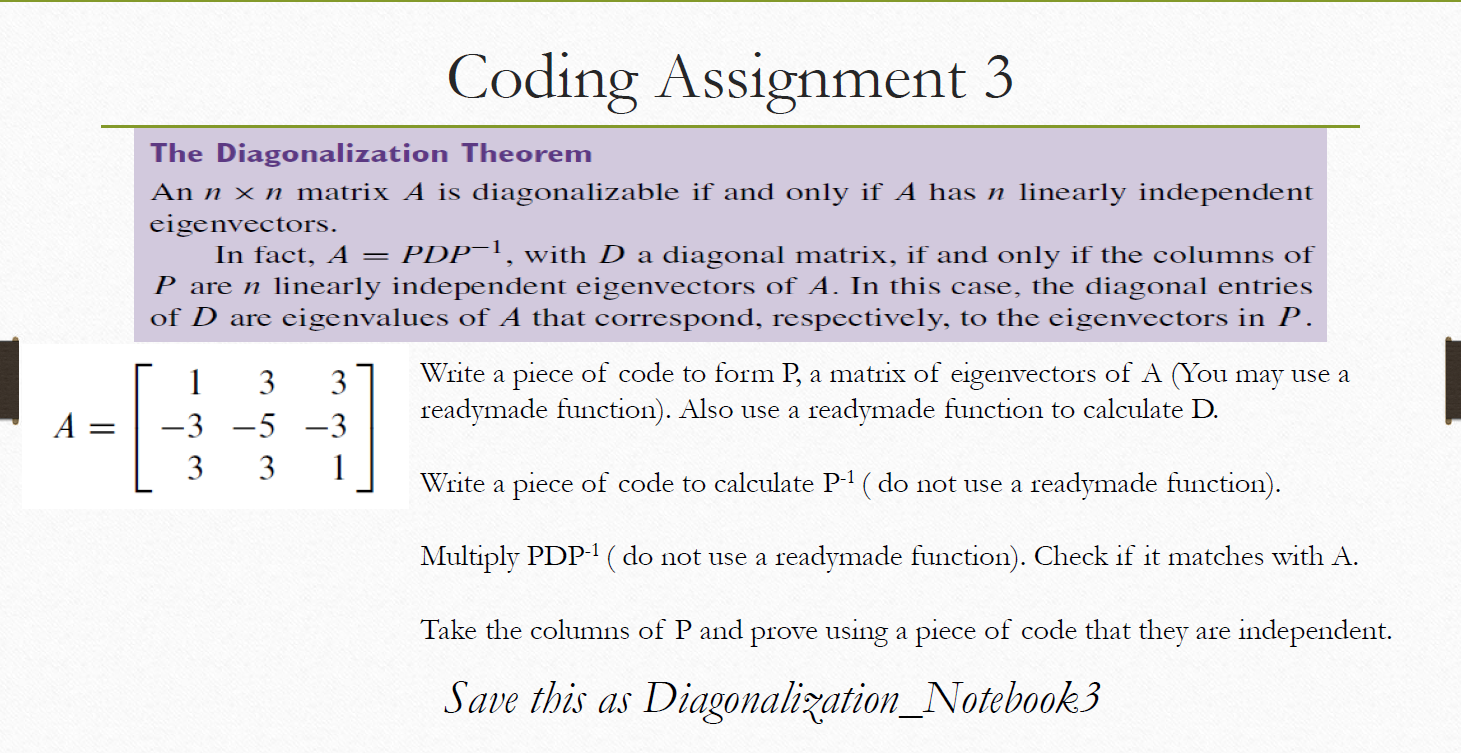

In [1]:
import numpy as np
import sympy as sp

In [2]:
def inverse_matrix(A):
    n = A.shape[0]  # Assuming A is a square matrix
    if np.linalg.det(A) == 0:
        return "Matrix is singular, inverse does not exist."

    # Augment A with the identity matrix of the same size
    augmented_matrix = np.hstack((A, np.eye(n)))

    # Perform Gaussian elimination with partial pivoting
    for i in range(n):
        # Find the pivot row (maximum element in the current column)
        pivot_row = np.argmax(np.abs(augmented_matrix[i:, i])) + i

        # Swap current row with the pivot row
        augmented_matrix[[i, pivot_row]] = augmented_matrix[[pivot_row, i]]

        # Divide row i by the pivot element to make it 1
        pivot_element = augmented_matrix[i, i]
        augmented_matrix[i, :] /= pivot_element

        # Eliminate non-zero elements below the pivot
        for j in range(i + 1, n):
            multiplier = augmented_matrix[j, i]
            augmented_matrix[j, :] -= multiplier * augmented_matrix[i, :]

    # Perform back substitution
    for i in range(n - 1, 0, -1):
        for j in range(i - 1, -1, -1):
            multiplier = augmented_matrix[j, i]
            augmented_matrix[j, :] -= multiplier * augmented_matrix[i, :]

    # Extract the inverse matrix from the augmented matrix
    inverse = augmented_matrix[:, n:]
    return inverse

In [3]:
def diagonalisation(A):
    P,D = sp.Matrix(A).diagonalize()
    P=np.array(P,dtype=float)
    D=np.array(D,dtype=float)
    P_inverse=inverse_matrix(P)
    return P,D,P_inverse

In [4]:
matrix=[[1, 3, 3],[-3, -5, -3],[3, 3, 1]]
P,D,P_inverse=diagonalisation(matrix)
print("Non-Diagonal matrix =\n",matrix)
print("P =\n",P)
print("D =\n",D)
print("P_inverse =\n",P_inverse)

Non-Diagonal matrix =
 [[1, 3, 3], [-3, -5, -3], [3, 3, 1]]
P =
 [[-1. -1.  1.]
 [ 1.  0. -1.]
 [ 0.  1.  1.]]
D =
 [[-2.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  1.]]
P_inverse =
 [[ 1.  2.  1.]
 [-1. -1.  0.]
 [ 1.  1.  1.]]


Matrix multiplication of P X D X P^-1 to check if initial matrix is regained .

In [5]:
def matrix_multiplication(A, B):
    m, n = A.shape # A is m x n
    p, q = B.shape # B is p x q
    if n != p:
        return "Number of columns in A must be equal to number of rows in B." # Return an error message
    C = np.zeros((m, q)) # Initialize the result matrix with zeros
    for i in range(m):
        for j in range(q):
            C[i, j] = np.sum(A[i, :] * B[:, j]) # Compute the dot product of the i-th row of A and the j-th column of B
    return C # Return the result matrix

In [6]:
print("initial matrix : \n",matrix_multiplication(P,matrix_multiplication(D,P_inverse)))

initial matrix : 
 [[ 1.  3.  3.]
 [-3. -5. -3.]
 [ 3.  3.  1.]]
